### Lab2

#### Task1

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
csv = np.genfromtxt('ex2/ex2data1.txt', delimiter=",")
# Marks
x = csv[:,:2]
# Result
y = csv[:,2]
y = y.astype(np.int)
#print(x)
#print(y)
x1 = x[y==1]
x2 = x[y==0]
def plotInputData():
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x1[:, 0], x1[:, 1],'o',ms=7, label='Admitted')
    plt.plot(x2[:, 0], x2[:, 1],'rx',ms=7, label='Not admitted')
    plt.title('Input data')
    plt.ylabel('Mark2')
    plt.xlabel('Mark1')
plotInputData()
plt.legend()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 10, penalty='l2')
model.fit(x,y)
print(model.coef_)
print(model.intercept_)
theta = model.coef_.squeeze()
theta0 = model.intercept_
plot_x1 = np.array([ x[:,0].min(), x[:,0].max() ])
plot_x2 = (-1.0 / theta[1]) * (plot_x1 * theta[0] + theta0) 
plotInputData()
plt.plot(plot_x1, plot_x2, label='Decision boundary')
plt.legend(loc='lower left')
print(model.score(x, y))

#### Task2

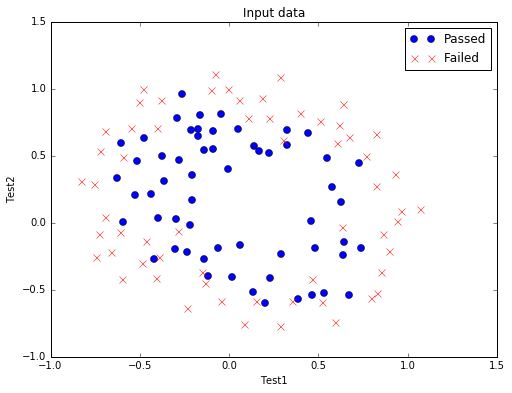

In [88]:
import numpy as np
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import matplotlib.pyplot as plt
csv = np.genfromtxt('ex2/ex2data2.txt', delimiter=",")
# Marks
x = csv[:,:2]
# Result
y = csv[:,2]
y = y.astype(np.int)
#print(x)
#print(y)
x1 = x[y==1]
x2 = x[y==0]
def plotInputData():
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x1[:, 0], x1[:, 1],'o',ms=7, label='Passed')
    plt.plot(x2[:, 0], x2[:, 1],'rx',ms=7, label='Failed')
    plt.title('Input data')
    plt.ylabel('Test2')
    plt.xlabel('Test1')
plotInputData()
plt.legend()

In [89]:
def mapFeature(x1, x2, degree):
    out = x1[:, np.newaxis]
    out = np.append(out, x2[:, np.newaxis], axis = 1)
    
    for i in range(2,degree+1):
        for j in range(0,i+1):
            a = x1**(i-j) * x2**j
            out = np.append(out, a[:, np.newaxis], axis = 1)
            #print(i-j,j)
    #print(out)
    return out
mapFeature(np.array([1, 2, 3]), np.array([4, 5, 6]), 3)

array([[  1,   4,   1,   4,  16,   1,   4,  16,  64],
       [  2,   5,   4,  10,  25,   8,  20,  50, 125],
       [  3,   6,   9,  18,  36,  27,  54, 108, 216]])

[[-0.30351677 -0.01813101]]
[-0.01418445]
0.550847457627
[[ -0.80294764   2.59407832 -12.69716743  -9.27742704   5.46564845
    2.52905444  16.4790715   27.55445807   3.7797396   43.91419327
   11.43461314  -6.26404906  -4.5653046  -34.13634881  10.44236605
   -7.7825446   -4.88150272 -16.24331014 -17.84841437  11.91864685
  -72.43530448 -36.36681844 -12.37032294  28.73399075 -51.72461561
  -36.91778112   2.00764354]]
[ 3.02976503]
0.864406779661


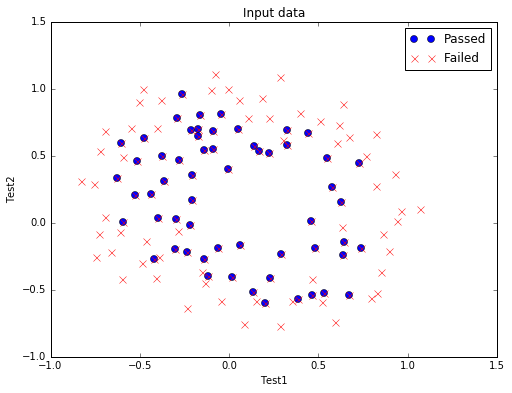

In [121]:
power = 6
model = LogisticRegression(C = 10000, penalty='l2')
model.fit(x,y)
print(model.coef_)
print(model.intercept_)
print(model.score(x, y))

x2 = mapFeature(x[:,0], x[:,1], power)
model.fit(x2,y)
print(model.coef_)
print(model.intercept_)
print(model.score(x2, y))
plotInputData()
plt.legend()

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:475: RuntimeWarning: invalid value encountered in ceil
  I = [np.floor(I[0]), np.ceil(I[1])]


<a list of 2 text.Text objects>

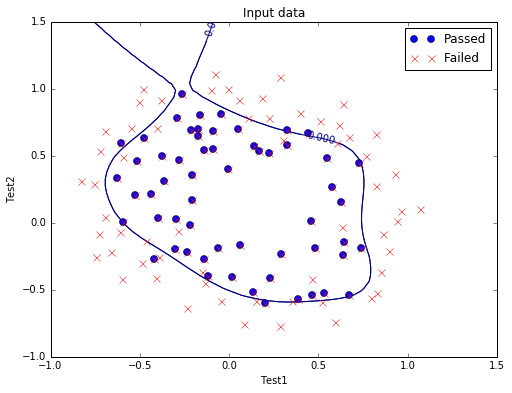

In [122]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((u.shape[0], v.shape[0]))
for i, c1 in enumerate(u):
    for j, c2 in enumerate(v):
        a = mapFeature(u[i, np.newaxis], v[j, np.newaxis], power)
        z[i,j] = a.dot(model.coef_.T)+model.intercept_
from matplotlib.pylab import plt
plotInputData()
plt.legend()
CS = plt.contour(u,v,z.T,[0,0])
plt.clabel(CS, inline=1, fontsize=10)